# Objective 
* 

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess

In [4]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string, print_subprocess_results

In [5]:
idf_file_relative = Path("example2/PythonPluginCustomSchedule.idf")
weather_file_realtive = Path("./weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw")
output_relative_directory='./example2/sim'

In [6]:
result = subprocess.run([f"{energyplus_install_dir}/energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_realtive}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )

In [7]:
print_subprocess_results(result)

---ARGS---
 ['/Applications/EnergyPlus-22-1-0/energyplus', '--readvars', '--output-directory', './example2/sim', '--weather', 'weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw', 'example2/PythonPluginCustomSchedule.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2022.06.14 20:56
Initializing Response Factors
Calculating CTFs for "INTERIORFURNISHINGS"
Calculating CTFs for "INT-FLOOR-TOPSIDE"
Calculating CTFs for "ROOFS"
Calculating CTFs for "ROOFS"
Calculating CTFs for "INT-WALLS"
Calculating CTFs for "EXT-WALLS"
Calculating CTFs for "EXT-SLAB"
Calculating CTFs for "EXPOSED-FLOOR"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surf

# review the values

In [8]:
df=pd.read_csv("example2/sim/eplusout.csv", 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string 
              )

In [13]:
df_trim = df['2021-07-01':'2021-08-01']

Text(0, 0.5, 'Air temperature (${^o}C$)')

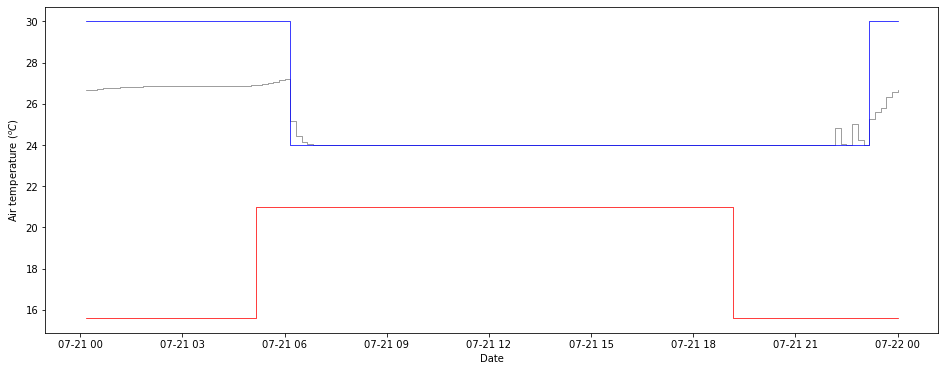

In [15]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_trim['HTGSETP_SCH:Schedule Value [](TimeStep)'],  
        color='red',
        drawstyle='steps-post',
        linewidth=0.75
       )

ax.plot(df_trim['Averaged Building Temperature:PythonPlugin:OutputVariable [C](TimeStep)'],  
        color='grey',
        drawstyle='steps-post',
        linewidth=0.75)

ax.plot(df_trim['CLGSETP_SCH:Schedule Value [](TimeStep)'],  
        color='blue',
        drawstyle='steps-post',
        linewidth=0.75
       )
ax.set_xlabel('Date')
ax.set_ylabel('Air temperature (${^o}C$)')  